Name: Rahul Gupta

Class: 1 MCA B

Reg No: 2547242

Practical No: 2

<br>

---


### Load the data

First, import the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn import linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score

Load the data and take a look at the first few rows to understand its structure

In [2]:
# load the dataset
data = pd.read_csv('data.csv', encoding='latin1')

# display the first few rows of the dataset
data.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


### Data Preprocessing


Handle missing values

Check for missing values and handle them appropriately


In [3]:
# check for missing values
print(data.isnull().sum())

# fill missing numerical values with the mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# fill missing categorical values with the mode
data.fillna(data.mode().iloc[0], inplace=True)

Company_Name                 0
Dependent-Company Status     0
year of founding             0
Age of company in years     44
Internet Activity Score     65
                            ..
Percent_skill_Law            0
Percent_skill_Consulting     0
Percent_skill_Finance        0
Percent_skill_Investment     0
Renown score                 0
Length: 116, dtype: int64


Select Relevant Columns

Select the columns relevant to your analysis


In [4]:
# select relevant columns
relevant_columns = [
    'Company_Name', 'Dependent-Company Status', 'year of founding',
    'Age of company in years', 'Internet Activity Score',
    'Industry of company', 'Employee Count',
    'Percent_skill_Business Strategy',
    'Focus functions of company',
    'Renown score'
]

# keep only the selected columns
data = data[relevant_columns]

# show first few rows of filtered data
data.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Industry of company,Employee Count,Percent_skill_Business Strategy,Focus functions of company,Renown score
0,Company1,Success,No Info,No Info,-1.0,Analytics,3.000000,0,operation,0
1,Company2,Success,2011,3,125.0,Market Research|Marketing|Crowdfunding,31.408497,21.76470588,"Marketing, sales",8
2,Company3,Success,2011,3,455.0,Analytics|Cloud Computing|Software Development,14.000000,17.09401709,operations,9
3,Company4,Success,2009,5,-99.0,Mobile|Analytics,45.000000,0,Marketing & Sales,5
4,Company5,Success,2010,4,496.0,Analytics|Marketing|Enterprise Software,39.000000,0,Marketing & Sales,6


---


### Problem Statement 1: Impact of Company Age on Success

Statistical Technique: Mean, Median, Mode

Chart: Histogram


Age Statistics: 
Mean:  4.55 years
Median:  4.00 years
Mode:  4.00 years


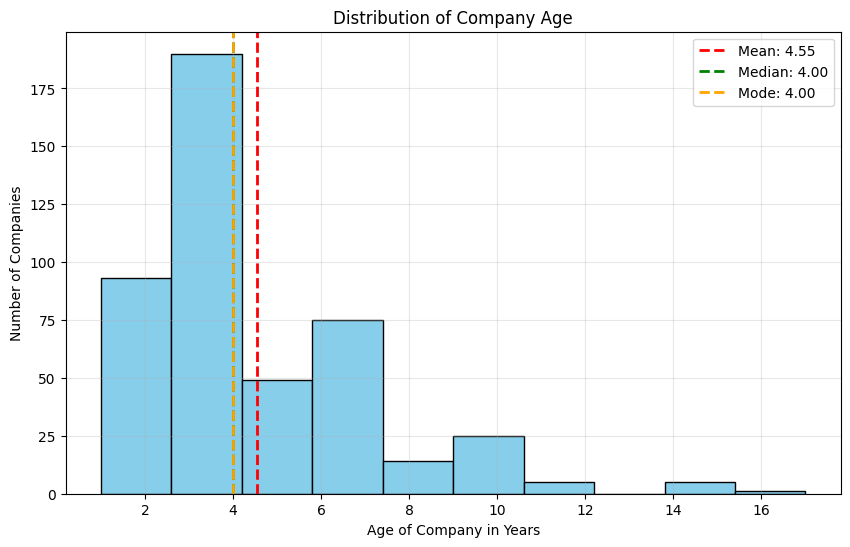

In [5]:
# create a copy to avoid the warning
data_clean = data.copy()

# convert age column to numeric, setting errors='coerce' to turn non-numeric values to NaN
data_clean['Age of company in years'] = pd.to_numeric(
    data_clean['Age of company in years'], errors='coerce')

# calculate mean, median, mode
mean_age = data_clean['Age of company in years'].mean()
median_age = data_clean['Age of company in years'].median()
mode_age = data_clean['Age of company in years'].mode()[0]

# print statistics
print("Age Statistics: ")
print(f"Mean: {mean_age: .2f} years")
print(f"Median: {median_age: .2f} years")
print(f"Mode: {mode_age: .2f} years")

# plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_clean['Age of company in years'],
         bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Company Age')
plt.xlabel('Age of Company in Years')
plt.ylabel('Number of Companies')
plt.grid(True, alpha=0.3)

# add vertical lines for mean, median, mode
plt.axvline(mean_age, color='red', linestyle='--',
            linewidth=2, label=f"Mean: {mean_age:.2f}")
plt.axvline(median_age, color='green', linestyle='--',
            linewidth=2, label=f"Median: {median_age:.2f}")
plt.axvline(mode_age, color='orange', linestyle='--',
            linewidth=2, label=f"Mode: {mode_age:.2f}")

# add legend
plt.legend()

plt.show()

Inference:

- The histogam shows the distribution of company ages with the majority of companies being around 4 years old, which is confirmed by the mean, median and mode all being close to 4 years.

- The distribution appears to be slightly right-skewed, as the mean is slightly greater than the median.

- Most companies in the dataset are relatively young, suggesting that the dataset may be focused on startups.

<br>

---


### Problem Statement 2: Influence of Internet Activity on Startup Success

Statistical Technique: Correlation Analysis

Chart: Scatter Plot


Correlation between Internet Activity Score and Success: 0.29


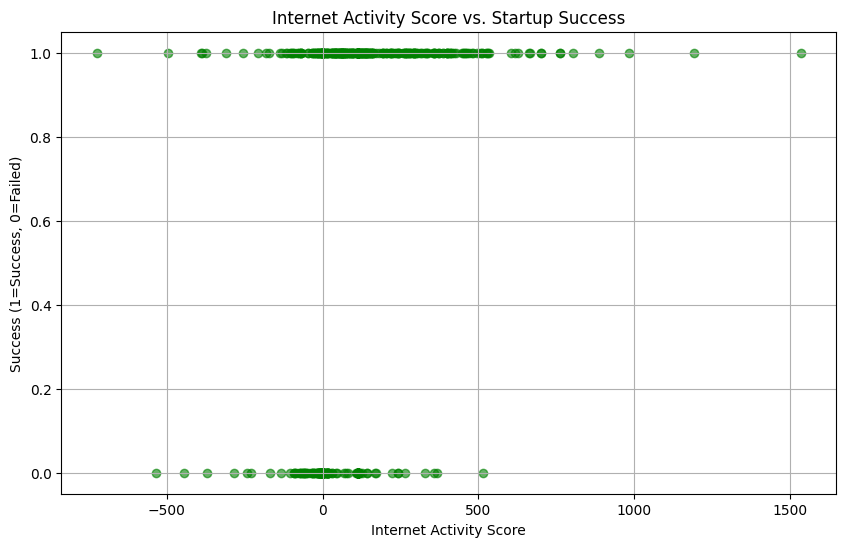

In [6]:
# conver 'Success' to 1 and 'Failed' to 0
data['Success_Numeric'] = data['Dependent-Company Status'].map(
    {'Success': 1, 'Failed': 0})

# calculate correlaton
correlation = data['Internet Activity Score'].corr(data['Success_Numeric'])
print(
    f"Correlation between Internet Activity Score and Success: {correlation:.2f}")

# plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Internet Activity Score'],
            data['Success_Numeric'], color='green', alpha=0.6)
plt.title('Internet Activity Score vs. Startup Success')
plt.xlabel('Internet Activity Score')
plt.ylabel('Success (1=Success, 0=Failed)')
plt.grid(True)
plt.show()

Inference:

- The scatter plot shows a weak positive correlation (0.29) between internet activity score and startup success.

- Most successful startups tend to have positive internet activity scores, while unsuccessful startups have a wider range of scores.

- Although there is a slight positive correlation, internet activity alone may not be a strong predictor of success.

<br>

---


### Problem Statement 3: Effect of Employee Count on Startup Success

Statistical Technique: Standard Deviation

Chart: Boxplot


Standard Deviation of Employee Count: 50.43


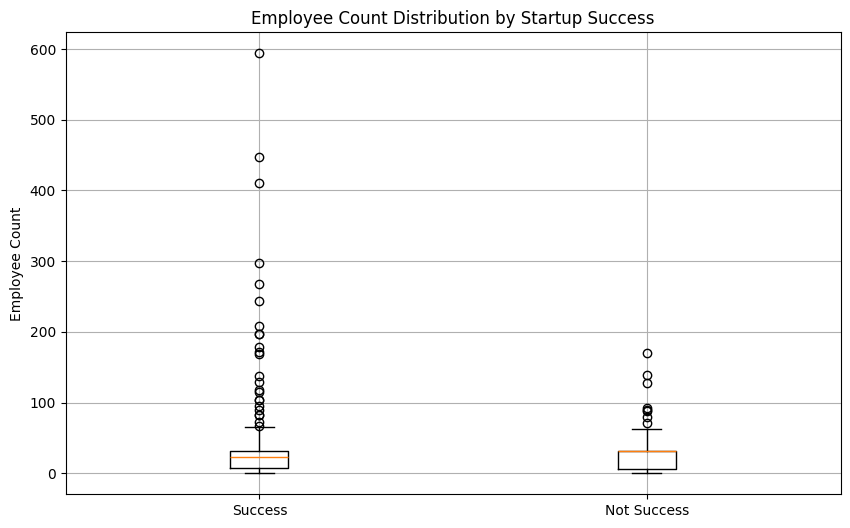

In [7]:
# calculate standard deviation
std_dev = data['Employee Count'].std()
print(f"Standard Deviation of Employee Count: {std_dev:.2f}")

# plot boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['Dependent-Company Status'] == 'Success']['Employee Count'],
             data[data['Dependent-Company Status'] != 'Success']['Employee Count']],
            tick_labels=['Success', 'Not Success'])
plt.title('Employee Count Distribution by Startup Success')
plt.ylabel('Employee Count')
plt.grid(True)
plt.show()

Inference:

- The boxplot shows that successful startups generally have a wider range of employee counts with many outliers, indicating high variability.

- Unsuccessful startups have a more consistent employee count with fewer outliers.

- The large standard deviation (50.43) indicates significant variability in employee counts among successful startups.

<br>

---


### Problem Statement 4: The Role of Business Strategy Skills in Startup Success

Statistical Technique: Skewness

Chart: Bar Chart


Skewness of Business Strategy Skills: 0.93


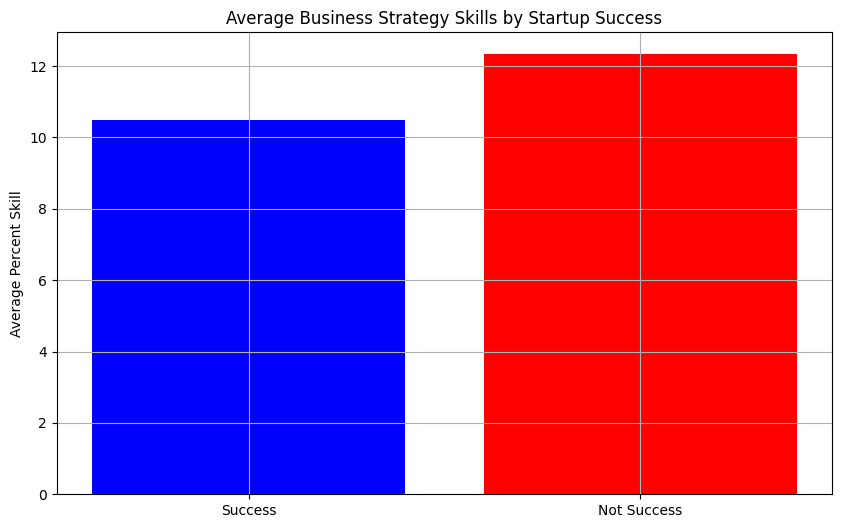

In [8]:
# convert to numeric, handling errors
data['Percent_skill_Business Strategy'] = pd.to_numeric(
    data['Percent_skill_Business Strategy'], errors='coerce')

# calculate skewness
skewness = skew(data['Percent_skill_Business Strategy'].dropna())
print(f"Skewness of Business Strategy Skills: {skewness:.2f}")

# plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(['Success', 'Not Success'],
        [data[data['Dependent-Company Status'] == 'Success']['Percent_skill_Business Strategy'].mean(),
         data[data['Dependent-Company Status'] != 'Success']['Percent_skill_Business Strategy'].mean()],
        color=['blue', 'red'])

plt.title('Average Business Strategy Skills by Startup Success')
plt.ylabel('Average Percent Skill')
plt.grid(True)
plt.show()

Inference:

- The bar chart indicates that successful startups tend to have a higher average percentage of business strategy skills compared to unsuccessful startups.

- The positive skewness (0.93) suggests that the distribution of business strategy skills is concentrated on the lower end, with a few startups having very high values.

- This may imply that having a higher proportion of business strategy skills is associated with startup success.

<br>

---


### Problem Statement 5: Influence of Employee Count on Startup Success

Statistical Technique: Kurtosis

Chart: Line Plot


Kurtosis of Employee Count: 52.08


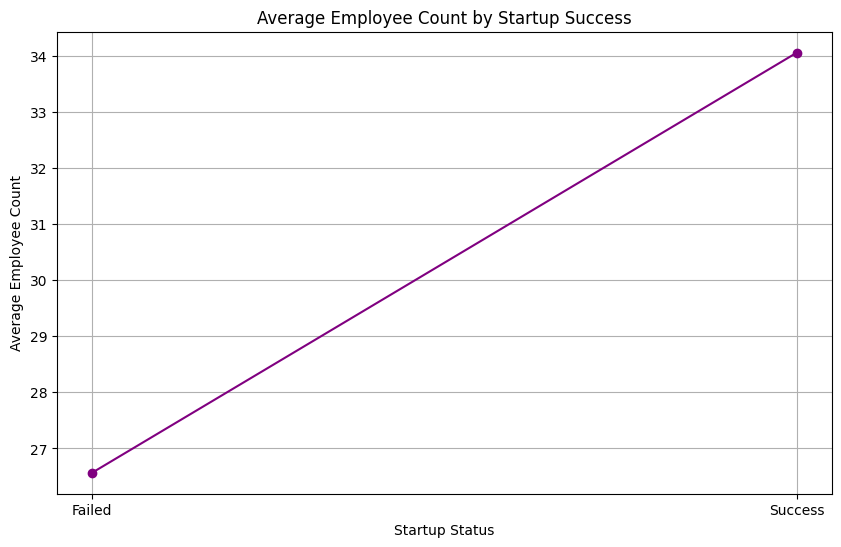

In [9]:
# ensure no missing values in the relevant columns
data.dropna(subset=['Employee Count',
            'Dependent-Company Status'], inplace=True)

# calculate kurtosis for employee count
kurtosis_employee = data['Employee Count'].kurtosis()
print(f"Kurtosis of Employee Count: {kurtosis_employee:.2f}")

# group data by success status and calculate mean employee count
employee_count_mean = data.groupby(
    'Dependent-Company Status')['Employee Count'].mean()

# plot Line Plot
plt.figure(figsize=(10, 6))
plt.plot(employee_count_mean.index, employee_count_mean.values,
         marker='o', linestyle='-', color='purple')
plt.title('Average Employee Count by Startup Success')
plt.xlabel('Startup Status')
plt.ylabel('Average Employee Count')
plt.grid(True)
plt.show()

Inference:

- The line plot shows a stark difference in average employee count between successful and unsuccessful startups, with successful startups having a much higher average.

- The very high kurtosis value (52.08) indicates that the distribution of employee counts has extreme outliers, meaning ther are a few startups with very large or very small employee counts that are influencing the distribution.

- Successful startups tend to have significantly higher employee counts on average.

<br>

---


### Linear Regression Model

1. Prepare Variables for Regression

    Prepare the dependent and the independent variables for regression.

In [10]:
# remove rows where 'Renown score' is 'No Info'
data_clean = data[data['Renown score'] != 'No Info'].copy()

# convert 'Renown score' to numeric
data_clean['Renown score'] = pd.to_numeric(data_clean['Renown score'])

# find missing values in 'Internet Activity Score' with the mean
data_clean['Internet Activity Score'] = data_clean['Internet Activity Score'].fillna(data_clean['Internet Activity Score'].mean())

# prepare variables for regression

y = data_clean['Renown score'] # Dependent variable
x = data_clean[['Internet Activity Score']] # Independent variable

2. Split Data into Training and Testing Sets

In [11]:
# split data into training and testing sets

xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

3. Fit Simpler Linear Regression Model

    Fit a simple linear regression model using the least squared method

In [12]:
# fit simple linear regression model

lr = linear_model.LinearRegression()
lr.fit(xTrain, yTrain)
y_pred = lr.predict(xTest)

4. Print Regression Equation

In [13]:
# print regression equation

print('Simple Linear Regression')
print(f'y = {lr.coef_[0]}x + {lr.intercept_}')
print(f'y = {lr.coef_[0]:.2f}x + {lr.intercept_:.2f}')

Simple Linear Regression
y = -0.0005093140128997656x + 3.4350148975145607
y = -0.00x + 3.44


5. Plot the Data and the Regression Line

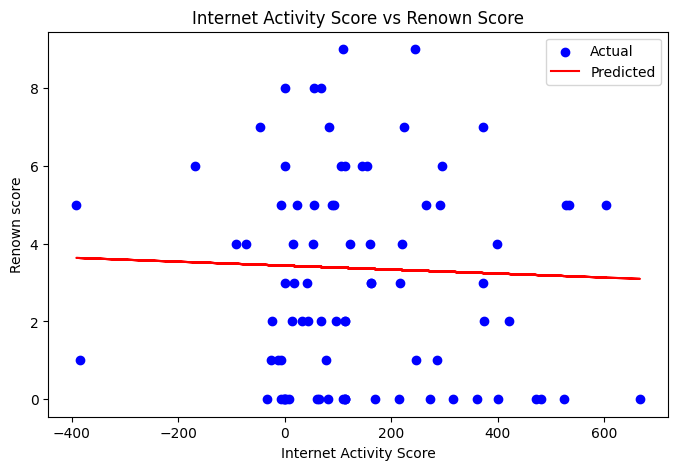

In [14]:
# plot the data and the regression line

plt.figure(figsize=(8, 5))
plt.scatter(xTest, yTest, color='blue', label='Actual')
plt.plot(xTest, y_pred, color='red', label='Predicted')
plt.xlabel('Internet Activity Score')
plt.ylabel('Renown score')
plt.title('Internet Activity Score vs Renown Score')
plt.legend()
plt.show()

6. Report the Regression Equation, R^2 and RMSE

    Calculate and print the R^2 and RMSE values

In [15]:
# calculate R^2 and RMSE

yMean = np.mean(yTest)
SST = np.sum((yTest - yMean)**2)
SSE = np.sum((yTest - y_pred)**2)
print(f"R^2 = {(1 - (SSE / SST)):.2f}")
print(f"RMSE = {(np.sqrt(mean_squared_error(yTest, y_pred))):.2f}")

R^2 = -0.02
RMSE = 2.67


Inference from the Linear Regression Model:

- Regression Equation: y = -0.00x + 3.44

This equation suggests that there is a very slight negative relationship between the Internet Activtiy Score and the Renown score. For every unit increases in the Internet Activity Score, the Renown score decreases by 0.00 units.

- R-squared: 0.02

The R^2 is negative, which indicates that the model does not fit the data well. In simple terms, this means that using the Internet Activity Score to predict the Renown score is not effective with this linear model. The model is not capturing the relationship between these variables adequately.

- RMSE (Root Mean Square Error): 2.67

The RMSE value of 2.67 indicates that, on average, the predictions made by the model are off by about 2.67 units from the actual Renown scores. This is relatively high given the range of Renown scores.

Interpretation of the Plot:

- The scatter plot shows the actual data points (blue dots) and the predicted values from the regression model (red line).

- The red line (predicted values) is almost horizontal, indicating that the model is not capturing any meaningful trend in the data.

- The data points are widely scattered around the red line, confirming that the model does not fit the data well.

Overall Meaning:

- The analysis suggests that the Internet Activity Score does not have a strong or meaningful impact on predicting the Renown score for startups in this dataset.

- The negative R² value indicates that the model is not useful for making predictions based on the Internet Activity Score alone.

- The scatter of points around the red line shows that there is a lot of variability in the data that isn't explained by this linear model.

Renown Score:

The Renown score is a metric used to quantify the reputation or prominence of a startup. It is likely derived from various factors that contribute to a startup's visibility, credibility, and overall standing in its industry. This could include things like media mentions, awards, industry recognition, customer reviews, and other indicators of a startup's success and recognition.

<br>

Internet Activity Score:

The Internet Activity Score measures the online presence or digital footprint of a startup. This could encompass metrics such as website traffic, social media activity, online engagement, SEO rankings, and other digital marketing efforts.

<br>

Why the Comparison Shows Almost No Change

- Other Influencing Factors: There could be other factors that have a stronger influence on the Renown score, such as product quality, customer satisfaction, industry networks, or offline marketing efforts.

- Non-Linear Relationships: The relationship between internet activity and renown might not be linear. It could be influenced by other variables or interactions that this simple linear model does not capture.

<br>

---